# Introduction

In this notebook we present an experimental study of the performance
and computational complexity of `PathCensus` algorithm.

For each of 1840 interactome networks of different sizes 
(see `3-proteins` analysis) we run `PathCensus` algorithm 5 times
and calculate average runtime. Moreover, we also calculated the average
runtime for a randomized analogue network sampled
from UBCM in order to see whether there are differences in efficiency
of `PathCensus` algorithm between structured and random-like networks.

As usual, the raw data was precomputed with `prepare_data.py` script
and the notebook presents only the actual results. See the script
for specifics of how we measured execution times.

In all cases we did not use parallelization, even for larger networks
(100k+ edges) for which `pathcensus` package uses it by default.

In [1]:
from pathlib import Path
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import get_root_path

# AESTHETICS
COLORS = (
    "#EB7159", 
    "#66C8E6", 
    "#AB65B5", 
    "#829F49",
    "#6876CE",
    "#BE8A3B",
    "#CF5786",
    "#AD483A"
) 

sns.set_theme(
    style="ticks",
    font_scale=1.5,
    rc={
        "figure.figsize": (15, 8),
        "font.size": 14,
        "axes.prop_cycle": plt.cycler(color=COLORS),
        "text.latex.preamble": r"\boldmath"
    }
)

ROOT = get_root_path() 
HERE = ROOT/"analyses"/"5-performance"
DATA = HERE/"data"

FIGPATH = ROOT/"figures"/"performance"
FIGPATH.mkdir(exist_ok=True, parents=True)

FIGKWS = dict(bbox_inches="tight", facecolor="white")
PNGKWS = dict(**FIGKWS, dpi=300)
FONTS  = dict(fontsize=18) 

# Get and prepare data frames
data = joblib.load(DATA/"times.pkl.gz") \
    .assign(
        otime_mean=lambda df: df["times_original"].apply(np.mean),
        rtime_mean=lambda df: df["times_randomized"].apply(np.mean),
        worstcase=lambda df: df["n_edges"]*df["star_max"]*df["dmax"],
        average=lambda df: df["n_edges"]*df["star_mean"]*df["dbar"],
        minworst=lambda df: df["n_edges"]*df["star_minmax"]*df["dmax"],
        minaverage=lambda df: df["n_edges"]*df["star_minmean"]*df["dbar"],
    )

In [2]:
## The results in the paper are based on 'minworst' metric
data[["worstcase", "average", "minworst", "minaverage", "otime_mean", "rtime_mean"]].corr()

,worstcase,average,minworst,minaverage,otime_mean,rtime_mean
worstcase,1.000000,0.934660,0.939329,0.894967,0.932338,0.788104
average,0.934660,1.000000,0.948497,0.987912,0.986311,0.723253
minworst,0.939329,0.948497,1.000000,0.898708,0.974456,0.861017
minaverage,0.894967,0.987912,0.898708,1.000000,0.956947,0.620777
otime_mean,0.932338,0.986311,0.974456,0.956947,1.000000,0.810406
rtime_mean,0.788104,0.723253,0.861017,0.620777,0.810406,1.000000


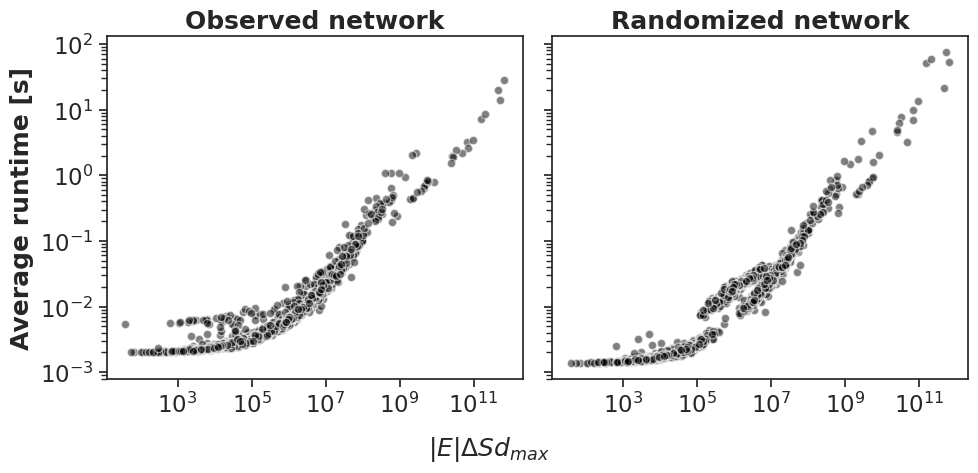

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

x    = "minworst"
cols = {
    "otime_mean": "Observed network",
    "rtime_mean": "Randomized network"
}
kws = dict(edgecolors="white", c="black", alpha=.5)

for ax, kv in zip(axes, cols.items()):
    y, label = kv
    ax.scatter(data[x], data[y], **kws)

    ax.set_xscale("log")
    ax.set_yscale("log")

    ax.set_title(label, **FONTS, fontweight="bold")


fig.supxlabel(
    r"$|E|\Delta{}Sd_{max}$", y=0.05,
    **FONTS, fontweight="bold"
)
axes[0].set_ylabel(
    r"Average runtime [s]",
    **FONTS, fontweight="bold"
)

fig.tight_layout()
fig.savefig(FIGPATH/"SI-performance.png", **PNGKWS)

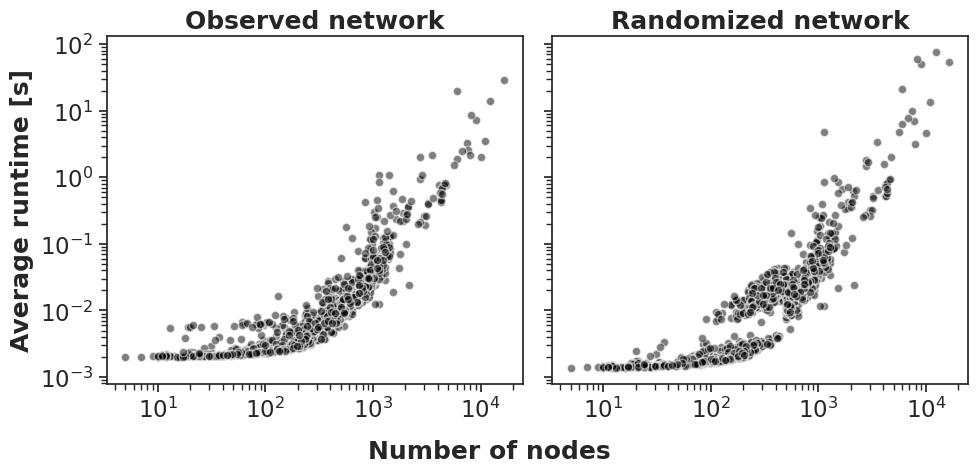

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

x    = "n_nodes"
cols = {
    "otime_mean": "Observed network",
    "rtime_mean": "Randomized network"
}
kws = dict(edgecolors="white", c="black", alpha=.5)

for ax, kv in zip(axes, cols.items()):
    y, label = kv
    ax.scatter(data[x], data[y], **kws)

    ax.set_xscale("log")
    ax.set_yscale("log")

    ax.set_title(label, **FONTS, fontweight="bold")


fig.supxlabel(
    r"Number of nodes", y=0.05,
    **FONTS, fontweight="bold"
)
axes[0].set_ylabel(
    r"Average runtime [s]",
    **FONTS, fontweight="bold"
)

fig.tight_layout()
fig.savefig(FIGPATH/"SI-performance-nodes.png", **PNGKWS)